# Inaugural project

In [10]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from HouseholdSpecializationModel import HSM

t = HSM()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Optimization with descrete intervals

In [11]:
# i cereate numpy arrays for the sigma and alpha values 
alpha_ = np.array([0.25, 0.5, 0.75])
sigma_ = np.array([0.5, 1, 1.5])

# and cereate the table using a double loop
def print_table(alpha_,sigma_):
    '''print a table og HF/HW with different values of sigma and alpha'''
    
    # a. empty text
    text = 'HF/HM'
    
    # b. top header
    text += f'{"":s}'
    for j,s in enumerate(sigma_):
       text += f'{s:6.2f}' 
    text += '\n' # line shift
    
    # c. body
    for i,a in enumerate(alpha_):
        t.par.alpha = alpha_[i]
        if i > 0:
            text += '\n' # line shift
        text += f'{a:.2f} ' # left header
        for j, s in enumerate(sigma_):
            t.par.sigma = sigma_[j]
            r = t.solve_discrete()
            text += f'{r.HF/r.HM:6.3f}'
    
    # d. print
    print(text)

print_table(alpha_,sigma_)

C:\Users\Wilhe\ITPANA\Inaugural project\Inaugural project hand in Wilhelm\HouseholdSpecializationModel.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


HF/HM  0.50  1.00  1.50
0.25  0.545 0.308 0.214
0.50  1.000 1.000 1.000
0.75  1.833 3.250 4.667


## 2. Different wages

In [12]:
# I return alpha and sigma to their original values
t.par.alpha = 0.5
t.par.sigma = 1

In [13]:
# and create empty lists
HF_HM = []
wF_wM = []

# i loop over each value of wF in the array, entering the value into the solve_discrete function and saving the results.
for i, a in enumerate(t.par.wF_vec):
    t.par.wF = t.par.wF_vec[i]
    o = t.solve_discrete()
    HF_HM.append(np.log(o.HF/o.HM))
    wF_wM.append(np.log(t.par.wF_vec[i]/t.par.wM))

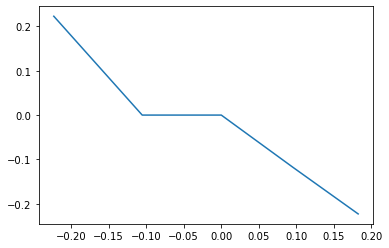

In [14]:
# plotting the figure
fig, ax = plt.subplots()
ax.plot(wF_wM, HF_HM)

## 3. Continuous

In [15]:
x, y = t.solve_wF_vec()

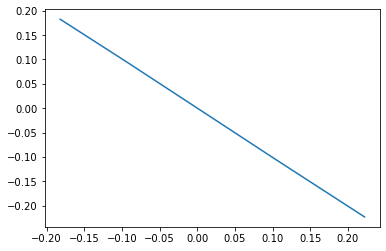

In [16]:
fig, ax = plt.subplots()
ax.plot(x, y)

## 4. Calibrate alpha and sigma

In [17]:
t.estimate()

alpha =  0.9821120762997089
sigma =  0.09985170979306462


This result suggests that women are significantly more productive in house work than men. This seems unlikely, unless were talking about a 1950's household where the husband can just barely make an omlette. 

## 5. Extension: alpha = 0.5 

In [18]:
t.modified_model(0.5)

AttributeError: 'HSM' object has no attribute 'modified_model'